In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory
import shutil
import pandas as pd
import numpy as np
import ast

In [58]:
import warnings
warnings.filterwarnings("ignore")

### Read all category csv files

In [59]:
topic_csv_dir = "topic_csv"

all_data_df = pd.read_csv(f"{topic_csv_dir}/all_results.csv")
print(f"Loaded file {topic_csv_dir}/all_results.csv with shape {all_data_df.shape}")
# convert Image column value to string
all_data_df["Image"] = all_data_df["Image"].astype(str)

# list all csv files in the directory
csv_files = [f for f in os.listdir(topic_csv_dir) if f != "all_results.csv"]
print(f"Now:, concatenating: {csv_files}")

# read all csv files and concatenate them into one dataframe
all_topic_df = pd.concat([pd.read_csv(os.path.join(topic_csv_dir, f)) for f in csv_files])
all_topic_df["Image"] = all_topic_df["Image"].astype(str)
print(f"Concatenated all csv files into one dataframe with shape {all_topic_df.shape}")

Loaded file topic_csv/all_results.csv with shape (60728, 36)
Now:, concatenating: ['N. Economy and work.csv', 'M. Race and ethnicity.csv', 'Q. Security.csv', 'J. News habits and media.csv', 'D. Politics and policy.csv', 'E. Demographics.csv', 'C. Science and technology.csv', 'L. Family and relationships.csv', 'G. International affairs.csv', 'A. Social values and attitudes.csv', 'I. Gender and LGBTQ.csv', 'B. Religion and spirituality.csv', 'O. Regions and countries.csv', 'K. Immigration and migration.csv', 'P. Methodological research.csv']
Concatenated all csv files into one dataframe with shape (60728, 36)


In [61]:
unique_questions_df = all_topic_df[all_topic_df['Image'] == 'True'][['question_topic', 'question_text', 'md_sim_topic', 'question_topic_mean_similarity','question_topic_country_mean_similarity', 'country']].drop_duplicates()
unique_questions_df = unique_questions_df.groupby(['question_topic', 'country'])
unique_questions_df.head(2)

,question_topic,question_text,md_sim_topic,question_topic_mean_similarity,question_topic_country_mean_similarity,country
1151,N. Economy and work,Now I'd like you to tell me your views on vari...,0.688920,0.583884,0.545230,Bangladesh
1156,N. Economy and work,"Do you agree, disagree or neither agree nor di...",0.539033,0.583884,0.545230,Bangladesh
1241,N. Economy and work,Here are two statements people sometimes make ...,0.878187,0.583884,0.590010,Brazil
1245,N. Economy and work,Now I'd like you to tell me your views on vari...,0.638958,0.583884,0.590010,Brazil
1346,N. Economy and work,"For each of the following aspects, indicate ho...",0.730328,0.583884,0.561843,China
...,...,...,...,...,...,...
10365,P. Methodological research,Please tell me for each of the following state...,0.534480,0.533095,0.587479,Spain
10584,P. Methodological research,I ‘d like to ask you how much you trust people...,0.614970,0.533095,0.531629,United States
10585,P. Methodological research,"Among the following groups of people, how many...",0.615631,0.533095,0.531629,United States
11394,P. Methodological research,Vote in elections: Local level,0.684747,0.533095,0.517113,Vietnam


### Plot Question Topic level similarity and JSD values for each country
- This is per country
- Note that all images are for people of same demographic group

In [62]:
all_data_df.columns

Index(['img_id', 'image_path', 'country', 'image_code', 'income',
       'question_text', 'country_prompt', 'generic_prompt', 'option_labels',
       'full_options', 'prompt', 'options', 'top10_token_prob',
       'prob_percent_sorted', 'sum_prob_percent_sorted', 'prob_percent_keys',
       'prob_percent_values', 'selection_answers', 'jsd', 'similarity',
       'Image', 'model_size', 'country_mean_jsd', 'coutry_mean_similarity',
       'question_topic', 'question_topic_mean_jsd',
       'question_topic_mean_similarity',
       'question_topic_country_mean_similarity', 'md_topic_pred',
       'md_topic_gt', 'md_all_pred', 'md_all_gt', 'md_jsd_topic',
       'md_sim_topic', 'md_jsd_overall', 'md_sim_overall'],
      dtype='object')

In [63]:

ds_rich_countries = ["United States"]
ds_medium_countries = ["Brazil", "China", "South Africa" ]
ds_poor_countries = ["Nigeria", "Bangladesh", "Pakistan"]

country_list = ds_rich_countries + ds_medium_countries + ds_poor_countries

In [64]:
print(all_data_df['Image'].unique())
print(all_topic_df['Image'].dtype)

['False' 'True']
object


In [65]:


# # Directory to save individual figures
# individual_figures_dir = 'plots/individual_topic'
# if os.path.exists(individual_figures_dir):
#     shutil.rmtree(individual_figures_dir)
#     print(f"Existed! Deleted {individual_figures_dir} directory")
# os.makedirs(individual_figures_dir, exist_ok=True)

# # List of unique question topics
# question_topics = sorted(all_data_df['question_topic'].unique())

# # Prepare for plotting
# n_cols = 3  # Number of subplots per row
# n_rows = int(np.ceil(len(question_topics) / n_cols))

# fig_width = 6 * n_cols
# fig_height = 4 * n_rows
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
# axs = axs.flatten()  # Flatten the array of axes


# for idx, topic in enumerate(question_topics):
#     df_category = all_data_df[all_data_df['question_topic'] == topic]
    
#     # Convert 'Image' column to boolean
#     df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
#     # Calculate mean 'question_topic_mean_similarity' per country and Image scenario
#     df_mean = df_category.groupby(['country', 'Image'])['question_topic_mean_similarity'].mean().reset_index()
    
#     # Pivot the data to have Image scenarios as columns
#     df_pivot = df_mean.pivot(index='country', columns='Image', values='question_topic_mean_similarity').reset_index()
    
#     # Rename columns using boolean keys
#     df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
#     # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
#     if 'Text Similarity' not in df_pivot.columns:
#         df_pivot['Text Similarity'] = np.nan
#     if 'Image Similarity' not in df_pivot.columns:
#         df_pivot['Image Similarity'] = np.nan
    
#     # Drop countries that have missing data in either scenario
#     df_pivot = df_pivot.dropna()
    
#     # Sort countries based on 'country_list'
#     df_pivot['country'] = pd.Categorical(df_pivot['country'], categories=country_list, ordered=True)

#     # Drop countries that have missing data in either scenario
#     df_pivot = df_pivot.dropna()
#     df_pivot = df_pivot.sort_values('country')
    
#     # Data for plotting
#     countries = df_pivot['country']
#     text_similarities = df_pivot['Text Similarity']
#     image_similarities = df_pivot['Image Similarity']
    
#     x = np.arange(len(countries))  # Label locations
#     width = 0.20  # Width of the bars
    
#     ax = axs[idx]
    
#     # Plot bars on the subplot
#     ax.bar(x - width/2, text_similarities, width, label= 'Only Country(No Images)')
#     ax.bar(x + width/2, image_similarities, width, label='Only Images(No Country)')
    
#     # Compute the mean similarity for the topic using text-level data only
#     text_mean = df_pivot['Text Similarity'].mean()
    
#     # Plot horizontal red dashed line at text_mean
#     ax.axhline(text_mean, color='red', linestyle='--')

#     # Create a blended transformation for the subplot
#     transform = blended_transform_factory(ax.transAxes, ax.transData)
    
#     # Annotate the mean value on the plot
#     ax.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax.get_yaxis_transform())
    
#     # Remove prefix (e.g., 'A.', 'B.', etc.) from topic name
#     topic_title = topic.split('.', 1)[-1].strip()
    
#     # Add labels, title, and custom x-axis tick labels
#     ax.set_ylabel('Mean Similarity')
#     ax.set_title(f'{topic_title}')
#     ax.set_xticks(x)
#     ax.set_xticklabels(countries, rotation=90)
#     ax.tick_params(axis='x', which='major', labelsize=8)
    
#     # Create individual figure for the topic
#     fig_individual, ax_individual = plt.subplots(figsize=(8, 4))
    
#     # Plot bars on the individual figure
#     ax_individual.bar(x - width/2, text_similarities, width, label= 'Only Country(No Images)', color='mediumpurple')
#     ax_individual.bar(x + width/2, image_similarities, width, label='Only Images(No Country)', color='rebeccapurple')
    
#     # Plot horizontal red dashed line at text_mean
#     ax_individual.axhline(text_mean, color='red', linestyle='--')
    
#     # Annotate the mean value on the individual plot
#     ax_individual.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax_individual.get_yaxis_transform())
    
#     # Add labels, title, and custom x-axis tick labels
#     ax_individual.set_ylabel('Mean Similarity')
#     ax_individual.set_title(f'{topic_title}')
#     ax_individual.set_xticks(x)
#     ax_individual.set_xticklabels(countries, rotation=90)
#     ax_individual.tick_params(axis='x', which='major', labelsize=8)
    
#     # Add legend to individual figure, located in the upper right corner outside the plot area
#     ax_individual.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=6)
    
#     # Adjust layout to make room for the legend
#     fig_individual.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend
    
#     # Save individual figure
#     fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
#     plt.close(fig_individual)  # Close the figure to free memory
    
# # Remove empty subplots if any
# for idx in range(len(question_topics), n_rows * n_cols):
#     fig.delaxes(axs[idx])

# # Adjust layout to make room for the legend
# plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

# # Add a single legend on the right
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.5), frameon=False)
# # Save the final figure with all subplots
# fig.savefig(f'{individual_figures_dir}/final_similarity_plot.png', bbox_inches='tight')

# plt.show()


Existed! Deleted plots/individual_topic directory


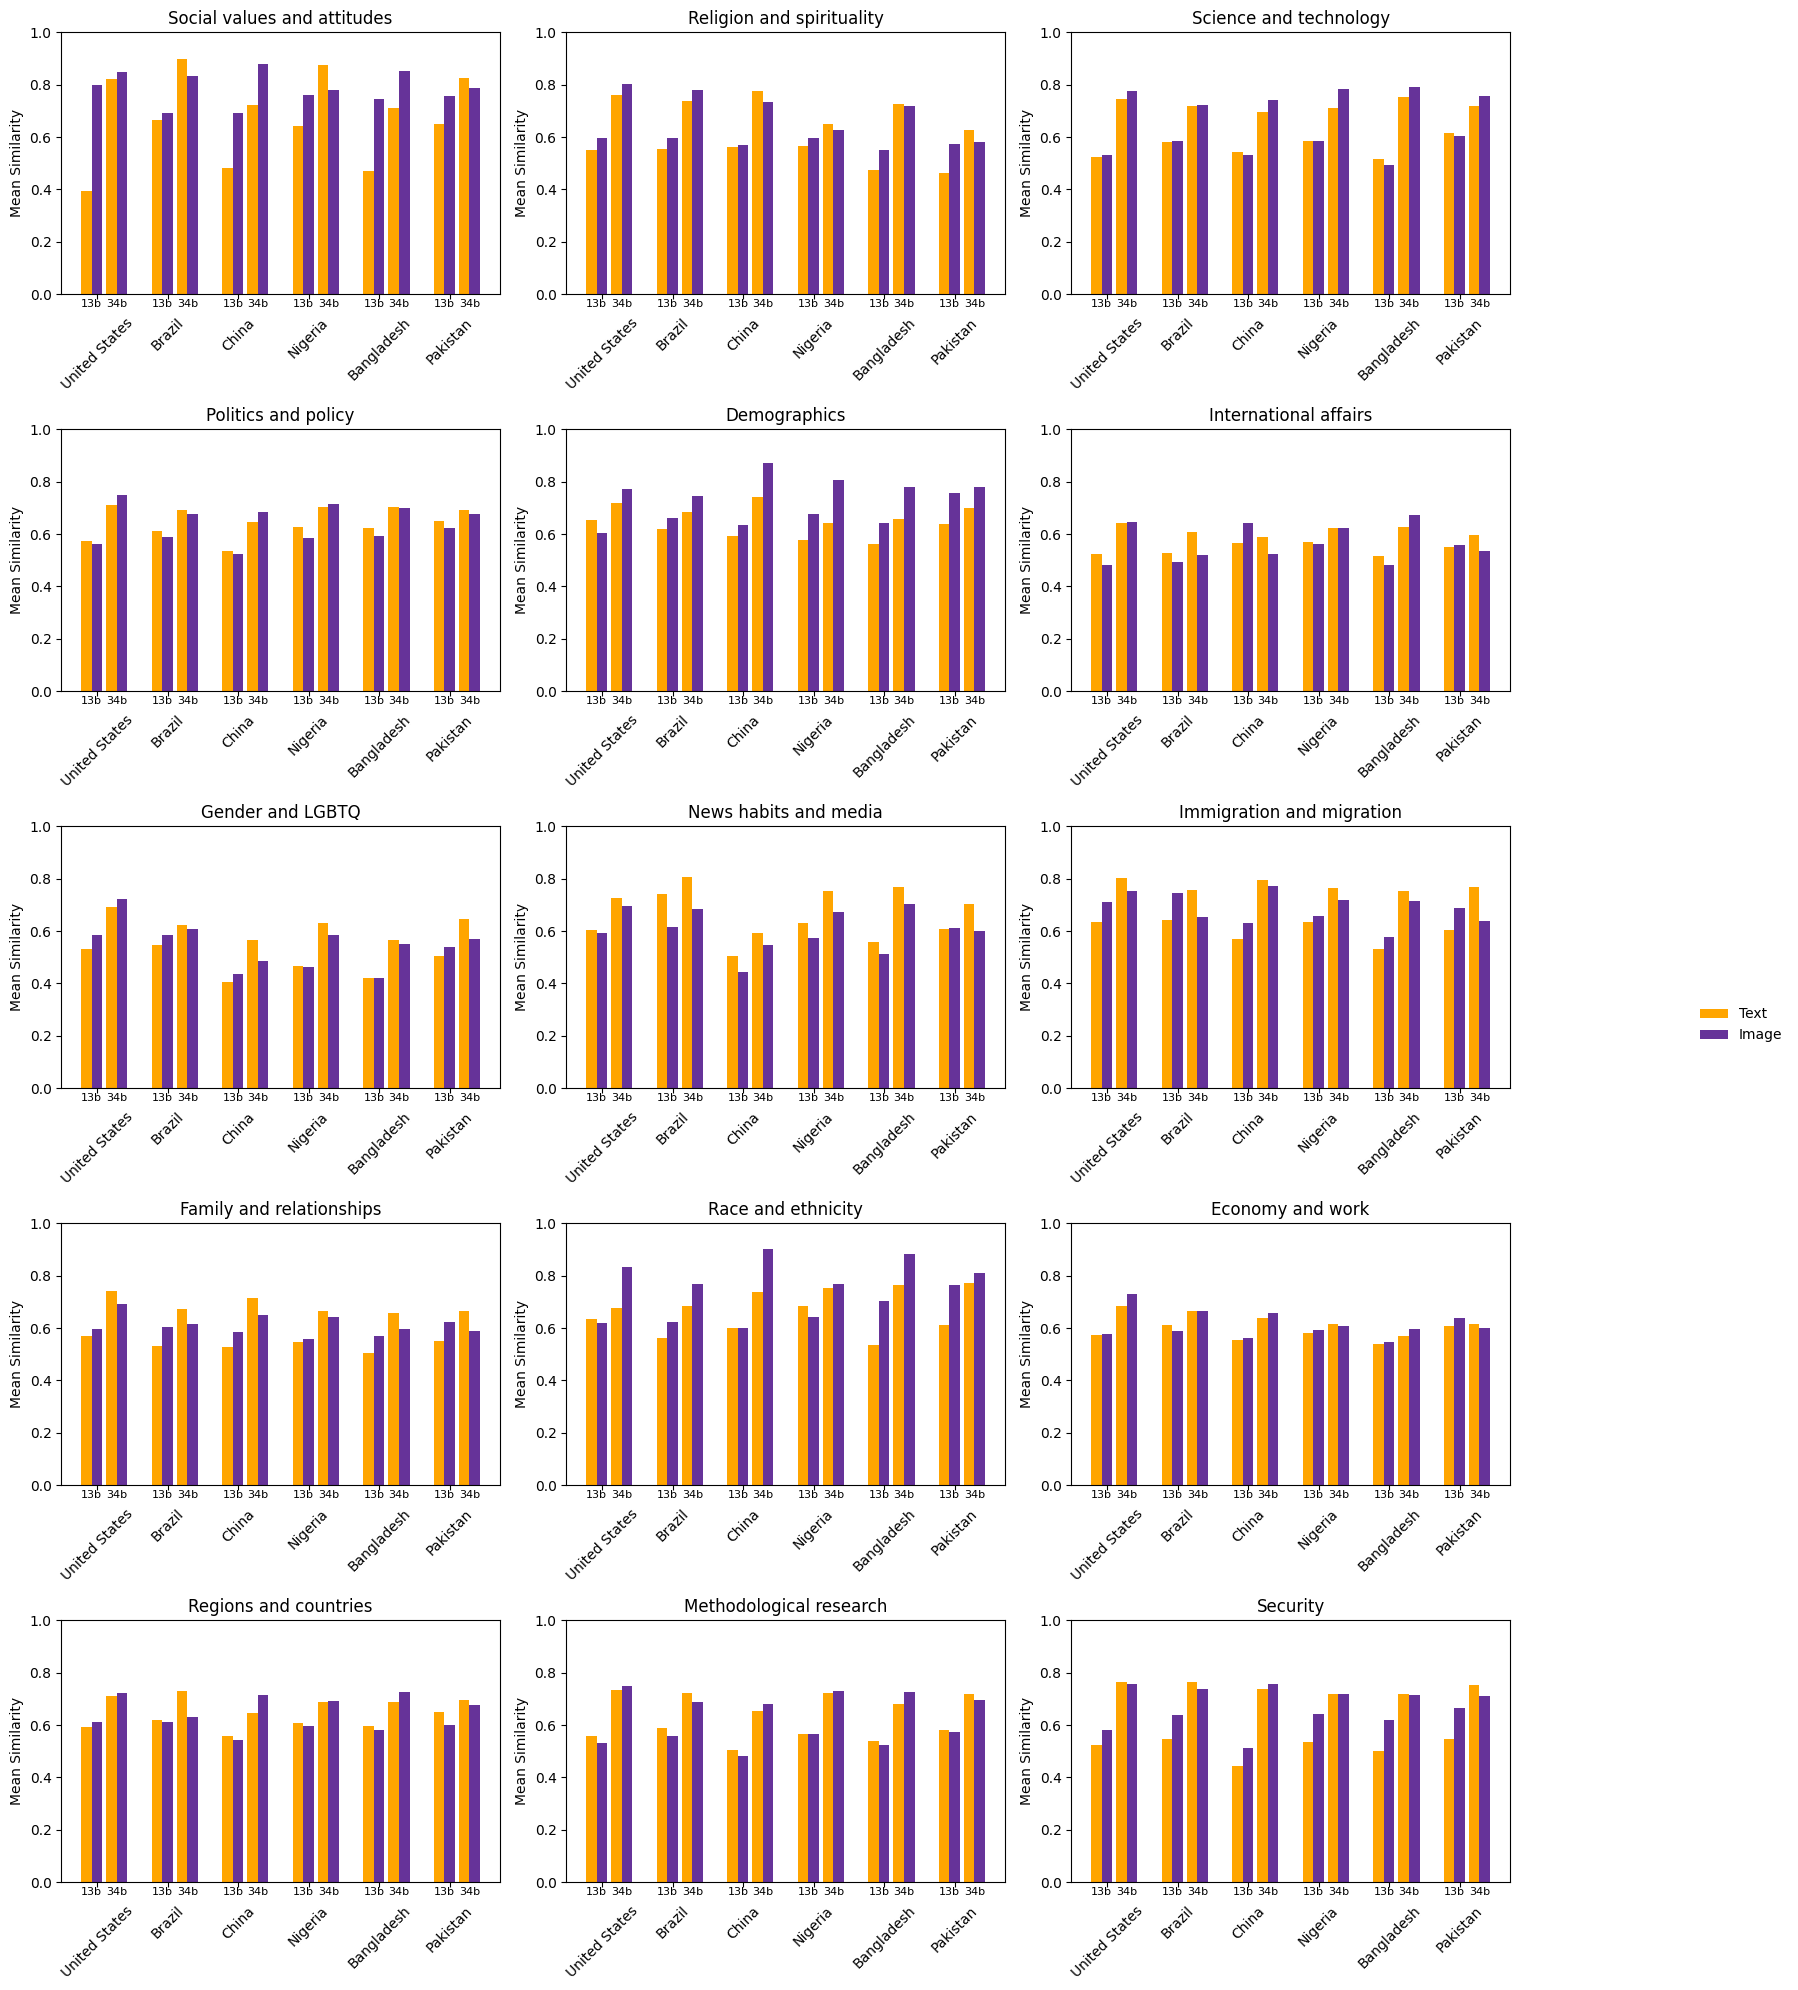

In [66]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from tqdm import tqdm

# Directory to save individual figures
individual_figures_dir = 'plots/individual_topic'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(all_data_df['question_topic'].unique())
models = sorted(all_data_df['model_size'].unique())

# Prepare for plotting
n_cols = 3  # Number of subplots per row
n_rows = int(np.ceil(len(question_topics) / n_cols))

fig_width = 6 * n_cols
fig_height = 4 * n_rows
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()  # Flatten the array of axes

# Loop through each topic to create subplots
for idx, topic in enumerate(question_topics):
    df_category = all_data_df[all_data_df['question_topic'] == topic]

    # Prepare DataFrame by calculating means for each combination of 'country', 'Image', and 'model_size'
    df_category.loc[:, 'Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Calculate mean 'question_topic_mean_similarity' and 'md_sim_topic' per country, Image scenario, and model_size
    df_mean = df_category.groupby(['country', 'Image', 'model_size'])[['question_topic_country_mean_similarity', 'md_sim_topic']].mean().reset_index()

    # Pivot the data to have Image scenarios as columns (Text Similarity, Image Similarity, and Baseline)
    df_pivot = df_mean.pivot_table(index=['country', 'model_size'], columns='Image', values='question_topic_country_mean_similarity').reset_index()
    
    # Handle the three columns for baseline, text, and image similarity
    df_pivot['Baseline Similarity'] = df_mean[df_mean['Image'] == True].groupby(['country', 'model_size'])['md_sim_topic'].mean().values
    df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})

    # Ensure all similarity columns exist
    for col in ['Text Similarity', 'Image Similarity', 'Baseline Similarity']:
        if col not in df_pivot.columns:
            df_pivot[col] = np.nan
    

    # Sort countries based on 'country_list'
    df_pivot['country'] = pd.Categorical(df_pivot['country'], categories=country_list, ordered=True)
    df_pivot = df_pivot.sort_values('country')

    # Drop rows with missing data
    df_pivot = df_pivot.dropna()
    
    # Data for plotting
    countries = df_pivot['country'].unique()
    baseline_similarities = df_pivot['Baseline Similarity']
    text_similarities = df_pivot['Text Similarity']
    image_similarities = df_pivot['Image Similarity']
    
    x = np.arange(len(countries))  # Label locations
    width = 0.15  # Width of the bars for each model
    gap_between_models = 0.13  # A larger gap between the two models' sets of bars

    ax = axs[idx]
    
    bigf_has_plotted_text = False
    bigf_has_plotted_image = False
    # Loop through models and plot for each
    for model_idx, model in enumerate(models):
        df_model = df_pivot[df_pivot['model_size'] == model]
        
        # Drop rows where any of the similarity columns are NaN
        df_model = df_model.dropna()
        offset = model_idx * (width * 1.5 + gap_between_models)  # Offset between different models
        
        # Plot bars for baseline, text, and image similarity
        # ax.bar(x + offset - width, df_model['Baseline Similarity'], width, label=f'{model} - Baseline')
        if not bigf_has_plotted_text:
            ax.bar(x + offset, df_model['Text Similarity'], width, label='Text', color='orange')
            bigf_has_plotted_text = True
        else:
            ax.bar(x + offset, df_model['Text Similarity'], width, color='orange')
            
        if not bigf_has_plotted_image:
            ax.bar(x + offset + width, df_model['Image Similarity'], width, label=f'Image', color='rebeccapurple')
            bigf_has_plotted_image = True
        else:
            ax.bar(x + offset + width, df_model['Image Similarity'], width, color='rebeccapurple')
        # ax.bar(x + offset, df_model['Text Similarity'], width, label=f'{model} - Text', color='orange')
        # ax.bar(x + offset + width, df_model['Image Similarity'], width, label=f'{model} - Image', color='rebeccapurple')
        
        # Add model name annotation below the group of bars
        for i in range(len(x)):
            # Calculate the center position for the model label
            center_position = x[i] + offset + width / 2
            ax.text(center_position, -0.02, model, ha='center', va='top', fontsize=8, color='black', transform=ax.get_xaxis_transform())  # Adjust position as needed

    
    # Compute the mean similarity for the topic using text-level data only
    text_mean = df_pivot['Text Similarity'].mean()
    
    # Plot horizontal red dashed line at text_mean
    # ax.axhline(text_mean, color='red', linestyle='--')

    # Annotate the mean value on the plot
    # ax.text(0.01, text_mean, f'{text_mean:.2f}', color='black', ha='left', va='bottom', transform=ax.get_yaxis_transform())
    
    # Remove prefix (e.g., 'A.', 'B.', etc.) from topic name
    topic_title = topic.split('.', 1)[-1].strip()
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Mean Similarity')
    ax.set_title(f'{topic_title}')
    ax.set_xticks(x + width)  # Adjust x-axis to center
    ax.set_xticklabels(countries, rotation=45)  # Set x-tick labels (country names)
    ax.tick_params(axis='x', which='major', labelsize=10, pad=12)  # Adjust font size and appearance
    ax.set_ylim([0, 1])  # Set y-axis limits to [0, 1]
    
    # Create individual figure for the topic
    fig_individual, ax_individual = plt.subplots(figsize=(15, 4))
    
    # Set the width of each bar and define the number of models
    width = 0.15  # Set the width for the bars
    gap_between_models = 0.35  # A larger gap between the two models' sets of bars


    # To ensure only one legend entry per type (Text, Baseline, Image)
    has_plotted_text = False
    # has_plotted_baseline = False
    has_plotted_image = False

    # Plot bars for the individual figure
    for model_idx, model in enumerate(models):
        df_model = df_pivot[df_pivot['model_size'] == model]
        
        # Calculate the offset to center the bars around each x-tick
        if model_idx == 0:
            offset = -gap_between_models / 2  # Shift first model's bars to the left
        else:
            offset = gap_between_models / 2  # Shift second model's bars to the right
            
        # Plot the Text bars for both models
        if not has_plotted_text:
            # Add the label for the first time for Text
            ax_individual.bar(x + offset - width / 2, df_model['Text Similarity'], width, label='Text', color='orange')
            has_plotted_text = True  # Prevent further labeling for Text
        else:
            # No label for subsequent models
            ax_individual.bar(x + offset - width / 2 , df_model['Text Similarity'], width, color='orange')

        # Plot the Image bars for both models
        if not has_plotted_image:
            # Add the label for the first time for Image
            ax_individual.bar(x + offset + width / 2, df_model['Image Similarity'], width, label='Image', color='rebeccapurple')
            has_plotted_image = True  # Prevent further labeling for Image
        else:
            # No label for subsequent models
            ax_individual.bar(x + offset + width / 2 , df_model['Image Similarity'], width, color='rebeccapurple')
        
       # Add model name annotation above or below the group of bars
        for i in range(len(x)):
            # Calculate the center of the 2 bars for this model (Text, Baseline, Image)
            center_position = x[i] + offset + width / 2  # Adjust to center of the group
            ax_individual.text(center_position, -0.05, model, ha='center', va='bottom', fontsize=8, color='black')  # Move y-position below the axis
            
    # Add labels, title, and custom x-axis tick labels
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic_title}')
    # Set x-ticks to be at the center of the groups of bars
    # The middle point of each set of bars is `x + offset` for the second model, so we can set the x-ticks for that
    x_tick_positions = x + gap_between_models / 2  # Centered at the midpoint of the grouped bars
    ax_individual.set_xticks(x_tick_positions)  # Set x-tick positions
    ax_individual.set_xticklabels(countries)  # Set x-tick labels (country names)
    ax_individual.tick_params(axis='x', which='major', labelsize=10, pad=12)  # Adjust font size and appearance
    # set y max limit to 1
    ax_individual.set_ylim([0, 1])
    ax_individual.yaxis.set_ticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks in steps of 0.1

    
    # Add legend to individual figure, located in the upper right corner outside the plot area
    ax_individual.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=6)
    
    # Adjust layout to make room for the legend
    fig_individual.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend
    
    # Save individual figure
    fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
    plt.close(fig_individual)  # Close the figure to free memory
    
# Remove empty subplots if any
for idx in range(len(question_topics), n_rows * n_cols):
    fig.delaxes(axs[idx])

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

# Add a single legend on the right
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.5), frameon=False)

# Save the final figure with all subplots
fig.savefig(f'{individual_figures_dir}/final_similarity_plot.png', bbox_inches='tight')

plt.show()


### Plot Similarity Score for each economic strate 
- This is one single figure plit
- This is per low income, middle income and high income
- Note that all images are for people of same demographic group

In [51]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.transforms import blended_transform_factory

# # # Define income groups
# # rich_countries = ["United States", "Russia", "Romania", "France", "Spain", "Italy", "South Korea"]
# # medium_countries = ["Mexico", "Mongolia", "Brazil", "Colombia", "Iran", "Indonesia", "Philippines", "China"]
# # poor_countries = ["Ethiopia", "Nigeria", "Egypt", "Kenya", "Vietnam", "Bangladesh", "Pakistan"]

# # Create mapping from country to income group
# country_income_group = {}
# for country in ds_rich_countries:
#     country_income_group[country] = 'Rich'
# for country in ds_medium_countries:
#     country_income_group[country] = 'Medium'
# for country in ds_poor_countries:
#     country_income_group[country] = 'Poor'

# # Directory to save individual figures
# individual_figures_dir = 'plots/individual_topic_figures_income_groups'
# if os.path.exists(individual_figures_dir):
#     shutil.rmtree(individual_figures_dir)
#     print(f"Existed! Deleted {individual_figures_dir} directory")
# os.makedirs(individual_figures_dir, exist_ok=True)

# # List of unique question topics
# question_topics = sorted(final_result['question_topic'].unique())

# # Prepare for plotting
# n_cols = 3  # Number of subplots per row
# n_rows = int(np.ceil(len(question_topics) / n_cols))

# fig_width = 6 * n_cols
# fig_height = 4 * n_rows
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
# axs = axs.flatten()  # Flatten the array of axes

# for idx, topic in enumerate(question_topics):
#     df_category = df_category_similarity[topic].copy()
    
#     # Map 'country' to 'IncomeGroup'
#     df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
#     # Remove rows with missing IncomeGroup
#     df_category = df_category.dropna(subset=['IncomeGroup'])
    
#     # Convert 'Image' column to boolean
#     df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
#     # Calculate mean 'question_topic_mean_similarity' per IncomeGroup and Image scenario
#     df_mean = df_category.groupby(['IncomeGroup', 'Image'])['question_topic_mean_similarity'].mean().reset_index()
    
#     # Pivot the data to have Image scenarios as columns
#     df_pivot = df_mean.pivot(index='IncomeGroup', columns='Image', values='question_topic_mean_similarity').reset_index()
    
#     # Rename columns using boolean keys
#     df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
#     # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
#     if 'Text Similarity' not in df_pivot.columns:
#         df_pivot['Text Similarity'] = np.nan
#     if 'Image Similarity' not in df_pivot.columns:
#         df_pivot['Image Similarity'] = np.nan
    
#     # Drop IncomeGroups that have missing data in either scenario
#     df_pivot = df_pivot.dropna()
    
#     # Sort IncomeGroups in the order Rich, Medium, Poor
#     income_group_order = ['Rich', 'Medium', 'Poor']
#     df_pivot['IncomeGroup'] = pd.Categorical(df_pivot['IncomeGroup'], categories=income_group_order, ordered=True)

#     # Drop countries that have missing data in either scenario
#     df_pivot = df_pivot.dropna()
#     df_pivot = df_pivot.sort_values('IncomeGroup')
    
#     # Data for plotting
#     income_groups = df_pivot['IncomeGroup']
#     text_similarities = df_pivot['Text Similarity']
#     image_similarities = df_pivot['Image Similarity']
    
#     x = np.arange(len(income_groups))  # Label locations
#     width = 0.35  # Width of the bars
    
#     ax = axs[idx]
    
#     # Plot bars on the subplot
#     ax.bar(x - width/2, text_similarities, width, label='Country Prompt- No Images')
#     ax.bar(x + width/2, image_similarities, width, label='No Country Prompt- Only Images')
    
#     # Compute the mean similarity for the topic using text-level data only
#     text_mean = df_pivot['Text Similarity'].mean()
    
#     # Plot horizontal red dashed line at text_mean
#     ax.axhline(text_mean, color='red', linestyle='--')
    
#     # Create a blended transformation for the subplot
#     transform = blended_transform_factory(ax.transAxes, ax.transData)
    
#     # Annotate the mean value on the plot (left end)
#     ax.text(0.05, text_mean, f'{text_mean:.2f}', color='black',
#             ha='left', va='bottom', transform=transform)
    
#     # Remove prefix (e.g., 'A.', 'B.', etc.) from topic name
#     topic_title = topic.split('.', 1)[-1].strip()
    
#     # Add labels, title, and custom x-axis tick labels
#     ax.set_ylabel('Mean Similarity')
#     ax.set_title(f'{topic_title}')
#     ax.set_xticks(x)
#     ax.set_xticklabels(income_groups, rotation=0)
#     ax.tick_params(axis='x', which='major', labelsize=8)
    
#     # Create individual figure for the topic
#     fig_individual, ax_individual = plt.subplots(figsize=(6, 4))
    
#     # Plot bars on the individual figure
#     ax_individual.bar(x - width/2, text_similarities, width, label='Country Prompt- No Images')
#     ax_individual.bar(x + width/2, image_similarities, width, label='No Country Prompt- Only Images')
    
#     # Plot horizontal red dashed line at text_mean
#     ax_individual.axhline(text_mean, color='red', linestyle='--')
    
#     # Annotate the mean value on the individual plot (left end)
#     ax_individual.text(0.05, text_mean, f'{text_mean:.2f}', color='black',
#                        ha='left', va='bottom', transform=ax_individual.get_yaxis_transform())
    
#     # Add labels, title, and custom x-axis tick labels
#     ax_individual.set_ylabel('Mean Similarity')
#     ax_individual.set_title(f'{topic_title}')
#     ax_individual.set_xticks(x)
#     ax_individual.set_xticklabels(income_groups, rotation=0)
#     ax_individual.tick_params(axis='x', which='major', labelsize=8)
    
#     # Add legend to individual figure, located in the upper right corner outside the plot area
#     ax_individual.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    
#     # Adjust layout to make room for the legend
#     fig_individual.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend
    
#     # Save individual figure
#     fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic_title}.png'), bbox_inches='tight')
#     plt.close(fig_individual)  # Close the figure to free memory

# # Remove empty subplots if any
# for idx in range(len(question_topics), n_rows * n_cols):
#     fig.delaxes(axs[idx])

# # Adjust layout to make room for the legend
# plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

# # Add a single legend on the right
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right')

# # Save the final figure with all subplots
# fig.savefig(f'{individual_figures_dir}/final_similarity_plot_income_groups.png', bbox_inches='tight')

# plt.show()


Existed! Deleted plots/individual_topic_figures_income_groups directory


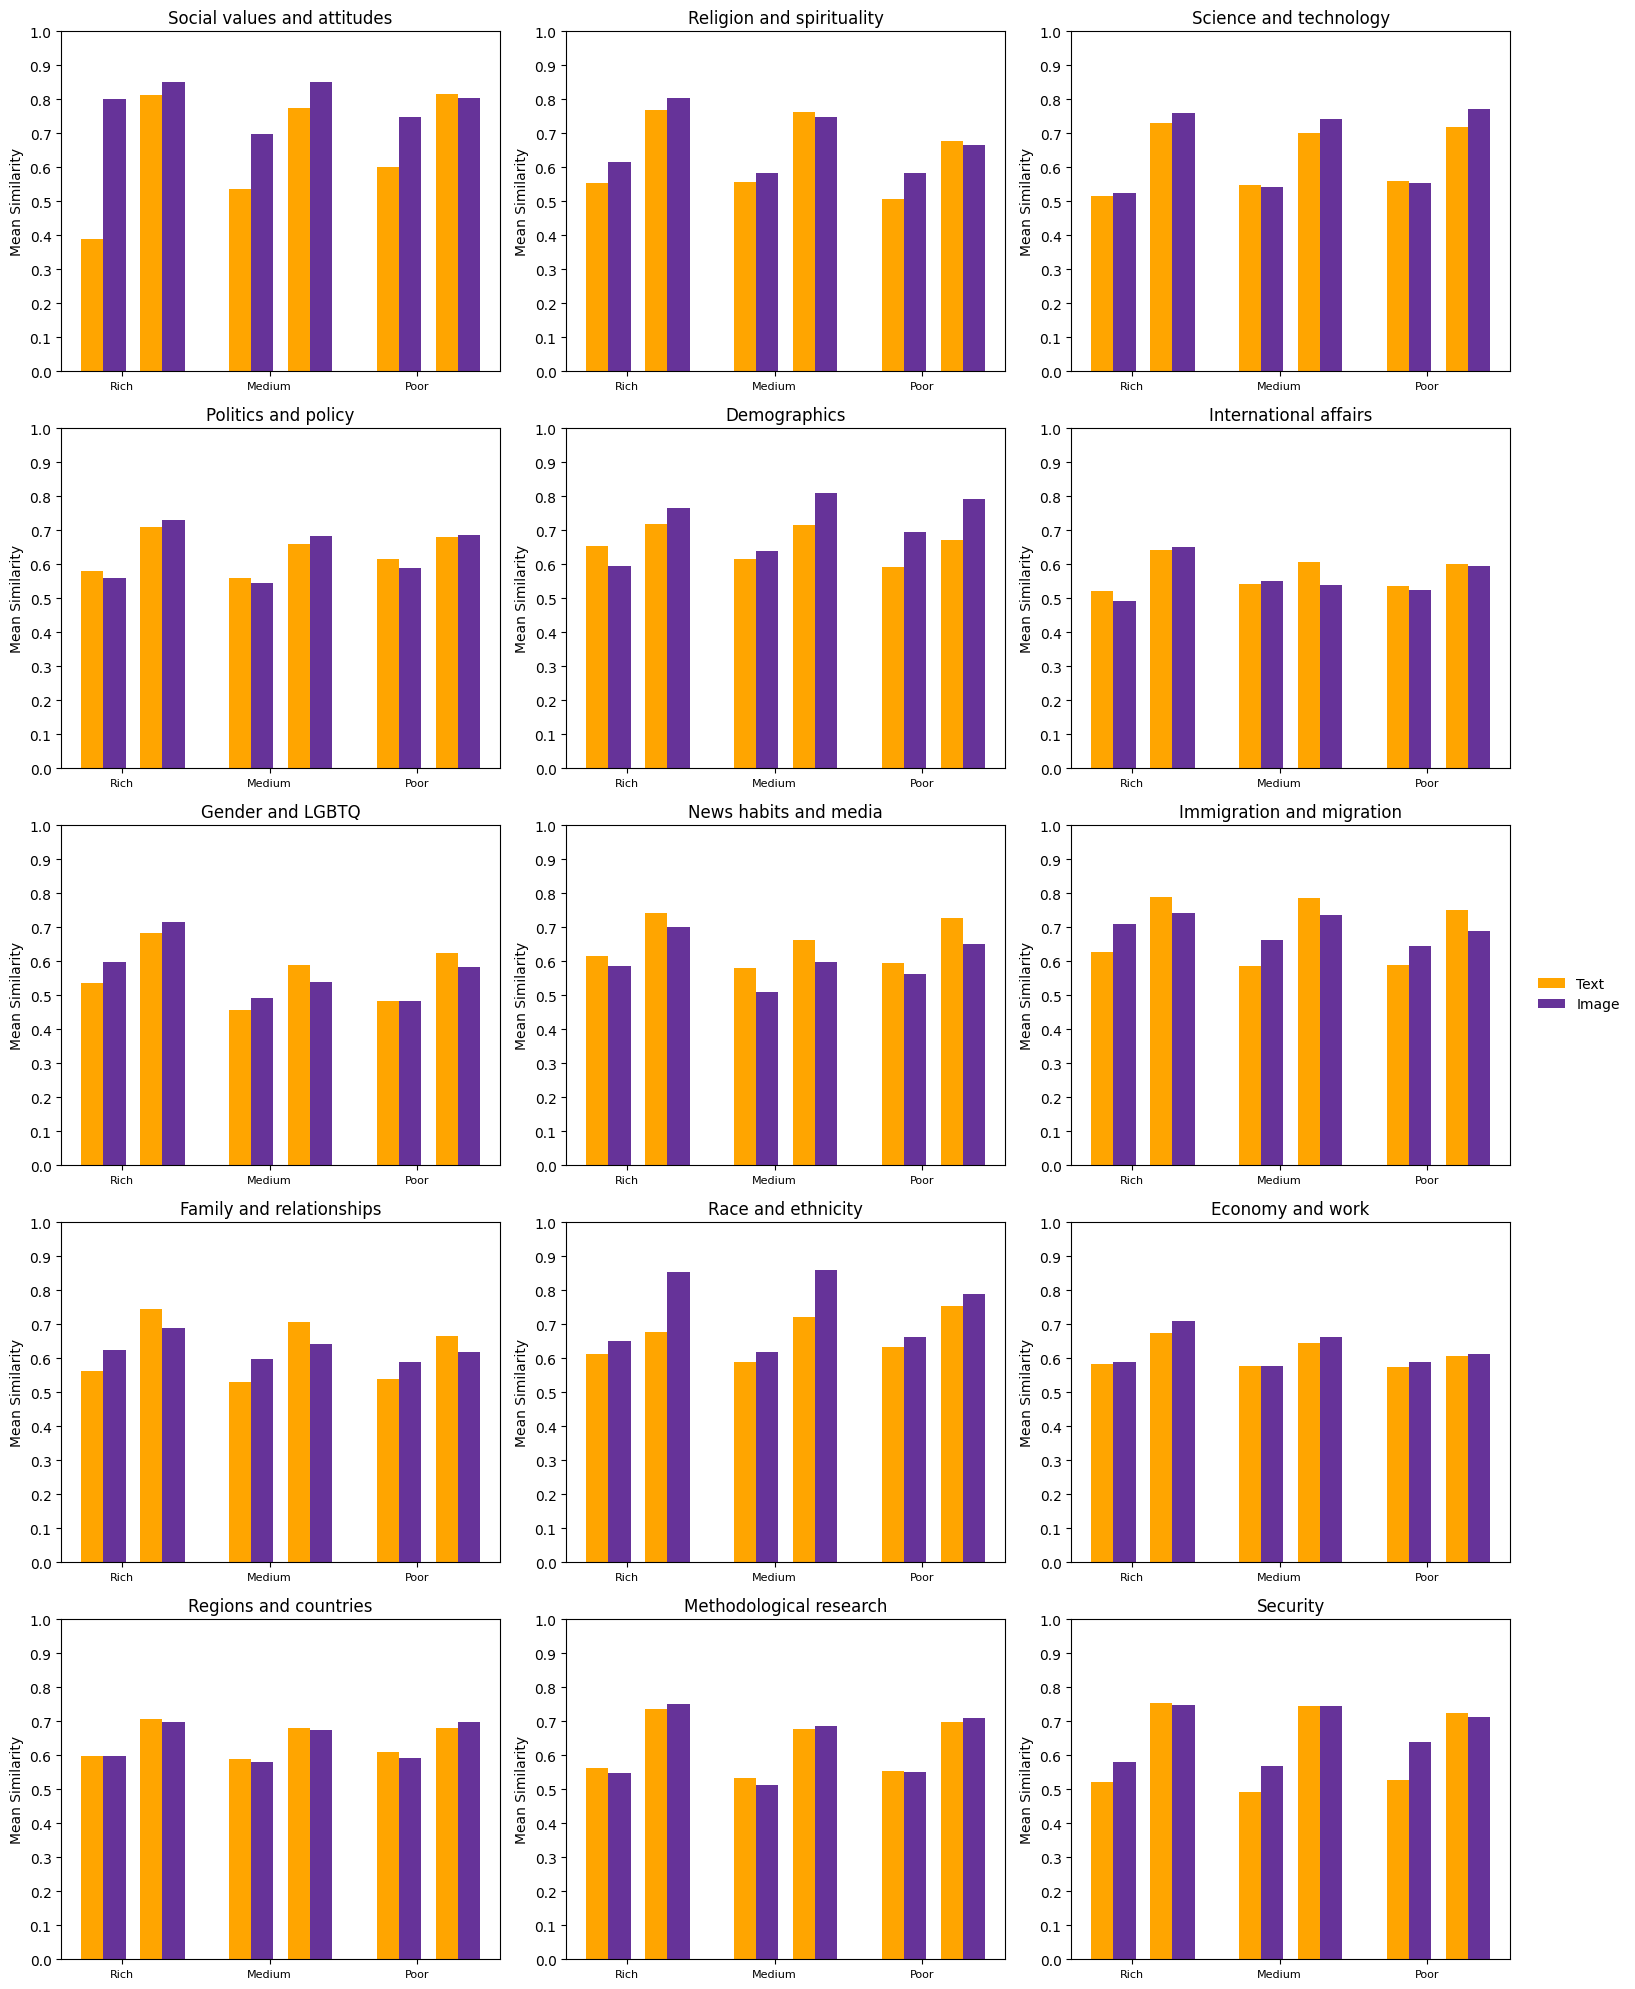

In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory

# Define income groups
rich_countries = ["United States", "Russia", "Romania", "France", "Spain", "Italy", "South Korea"]
medium_countries = ["Mexico", "Mongolia", "Brazil", "Colombia", "Iran", "Indonesia", "Philippines", "China"]
poor_countries = ["Ethiopia", "Nigeria", "Egypt", "Kenya", "Vietnam", "Bangladesh", "Pakistan"]

# Create mapping from country to income group
country_income_group = {}
for country in rich_countries:
    country_income_group[country] = 'Rich'
for country in medium_countries:
    country_income_group[country] = 'Medium'
for country in poor_countries:
    country_income_group[country] = 'Poor'

# Directory to save individual figures
individual_figures_dir = 'plots/individual_topic_figures_income_groups'
if os.path.exists(individual_figures_dir):
    shutil.rmtree(individual_figures_dir)
    print(f"Existed! Deleted {individual_figures_dir} directory")
os.makedirs(individual_figures_dir, exist_ok=True)

# List of unique question topics
question_topics = sorted(all_data_df['question_topic'].unique())

# Prepare for plotting
n_cols = 3  # Number of subplots per row
n_rows = int(np.ceil(len(question_topics) / n_cols))

fig_width = 6 * n_cols
fig_height = 4 * n_rows
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()  # Flatten the array of axes

# Loop through each topic to create subplots
for idx, topic in enumerate(question_topics):
    df_category = all_data_df[all_data_df['question_topic'] == topic]

    # df_category = df_category_similarity[topic].copy()
    
    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean
    df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Calculate mean 'question_topic_mean_similarity' per IncomeGroup, Image scenario, and model_size
    df_mean = df_category.groupby(['IncomeGroup', 'Image', 'model_size'])['question_topic_country_mean_similarity'].mean().reset_index()

    # Pivot the data to have Image scenarios as columns
    df_pivot = df_mean.pivot_table(index=['IncomeGroup', 'model_size'], columns='Image', values='question_topic_country_mean_similarity').reset_index()
    
    # Rename columns using boolean keys
    df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
    # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
    if 'Text Similarity' not in df_pivot.columns:
        df_pivot['Text Similarity'] = np.nan
    if 'Image Similarity' not in df_pivot.columns:
        df_pivot['Image Similarity'] = np.nan
    
    # Drop IncomeGroups that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    
    # Sort IncomeGroups in the order Rich, Medium, Poor
    income_group_order = ['Rich', 'Medium', 'Poor']
    df_pivot['IncomeGroup'] = pd.Categorical(df_pivot['IncomeGroup'], categories=income_group_order, ordered=True)

    # Sort IncomeGroups
    df_pivot = df_pivot.sort_values('IncomeGroup')
    
    # Data for plotting
    income_groups = df_pivot['IncomeGroup'].unique()
    x = np.arange(len(income_groups))  # Label locations
    width = 0.15  # Width of the bars for each model
    gap_between_models = 0.1  # A small gap between the models

    ax = axs[idx]
    # Initialize flags to track if Text and Image have been plotted for the legend
    has_plotted_text = False
    has_plotted_image = False
    
    # Loop through models and plot for each
    for model_idx, model in enumerate(df_pivot['model_size'].unique()):
        df_model = df_pivot[df_pivot['model_size'] == model]
        
        # Offset between different models to create a gap between them
        offset = model_idx * (width * 2 + gap_between_models)
        
        # Plot Text Similarity and Image Similarity bars for each model
        if not has_plotted_text:
            ax.bar(x + offset, df_model['Text Similarity'], width, label='Text', color='orange')
            has_plotted_text = True  # Set flag to True after plotting Text
        else:
            ax.bar(x + offset, df_model['Text Similarity'], width, color='orange')
        
        if not has_plotted_image:
            ax.bar(x + offset + width, df_model['Image Similarity'], width, label='Image', color='rebeccapurple')
            has_plotted_image = True  # Set flag to True after plotting Image
        else:
            ax.bar(x + offset + width, df_model['Image Similarity'], width, color='rebeccapurple')
    
    # Set x-ticks to be at the center of the groups of bars
    ax.set_xticks(x + (width * 2 + gap_between_models) / 2)  # Centered at the midpoint of the grouped bars
    ax.set_xticklabels(income_groups, rotation=0)
    ax.tick_params(axis='x', which='major', labelsize=8)
    ax.set_ylim([0, 1])  # Set y-axis limits to [0, 1]
    ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks with steps of 0.1

    # Set labels and title
    ax.set_ylabel('Mean Similarity')
    topic_title = topic.split('.', 1)[-1].strip()
    ax.set_title(f'{topic_title}')
    
    # # Add legend to the first subplot only
    # if idx == 0:
    #     ax.legend(loc='upper right')

# Retrieve handles and labels from one of the axes (e.g., the last plotted axis)
handles, labels = ax.get_legend_handles_labels()

# Adjust layout to make room for the legend on the right
plt.tight_layout(rect=[0, 0, 0.85, 1.0])  # Adjust to leave space for the legend on the right

# Add a single legend for the entire figure, positioned to the right of all subplots
fig.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5), frameon=False)

# Adjust layout for the final plot
# plt.tight_layout()
plt.show()

# Save the final figure
fig.savefig(f'{individual_figures_dir}/final_similarity_plot_income_groups.png', bbox_inches='tight')


### Plot Similarity Score for each economic strate 
- This is individual plot for each topic
- This is per low income, middle income and high income
- Note that all images are for people of same demographic group

In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import blended_transform_factory

# Define income groups
rich_countries = ["United States", "Russia", "Romania", "France", "Spain", "Italy", "South Korea"]
medium_countries = ["Mexico", "Mongolia", "Brazil", "Colombia", "Iran", "Indonesia", "Philippines", "China"]
poor_countries = ["Ethiopia", "Nigeria", "Egypt", "Kenya", "Vietnam", "Bangladesh", "Pakistan"]

# Create mapping from country to income group
country_income_group = {}
for country in rich_countries:
    country_income_group[country] = 'Rich'
for country in medium_countries:
    country_income_group[country] = 'Medium'
for country in poor_countries:
    country_income_group[country] = 'Poor'

# Directory to save individual figures
individual_figures_dir = 'plots/individual_topic_figures_income_groups'

# List of unique question topics
question_topics = sorted(all_data_df['question_topic'].unique())

# Loop through each topic to create individual plots
for idx, topic in enumerate(question_topics):
    df_category = all_data_df[all_data_df['question_topic'] == topic]

    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean
    df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Calculate mean 'question_topic_mean_similarity' per IncomeGroup, Image scenario, and model_size
    df_mean = df_category.groupby(['IncomeGroup', 'Image', 'model_size'])['question_topic_country_mean_similarity'].mean().reset_index()

    # Pivot the data to have Image scenarios as columns
    df_pivot = df_mean.pivot_table(index=['IncomeGroup', 'model_size'], columns='Image', values='question_topic_country_mean_similarity').reset_index()
    
    # Rename columns using boolean keys
    df_pivot = df_pivot.rename(columns={False: 'Text Similarity', True: 'Image Similarity'})
    
    # Ensure both 'Text Similarity' and 'Image Similarity' columns exist
    if 'Text Similarity' not in df_pivot.columns:
        df_pivot['Text Similarity'] = np.nan
    if 'Image Similarity' not in df_pivot.columns:
        df_pivot['Image Similarity'] = np.nan
    
    # Drop IncomeGroups that have missing data in either scenario
    df_pivot = df_pivot.dropna()
    
    # Sort IncomeGroups in the order Rich, Medium, Poor
    income_group_order = ['Rich', 'Medium', 'Poor']
    df_pivot['IncomeGroup'] = pd.Categorical(df_pivot['IncomeGroup'], categories=income_group_order, ordered=True)

    # Sort IncomeGroups
    df_pivot = df_pivot.sort_values('IncomeGroup')
    
    # Data for plotting
    income_groups = df_pivot['IncomeGroup'].unique()
    x = np.arange(len(income_groups))  # Label locations
    width = 0.15  # Width of the bars for each model
    gap_between_models = 0.1  # A small gap between the models

    # Create individual figure for the topic
    fig_individual, ax_individual = plt.subplots(figsize=(6, 4))
    
    # Initialize flags to track if Text and Image have been plotted for the legend
    has_plotted_text = False
    has_plotted_image = False
    
    # Loop through models and plot for each
    for model_idx, model in enumerate(df_pivot['model_size'].unique()):
        df_model = df_pivot[df_pivot['model_size'] == model]
        
        # Offset between different models to create a gap between them
        offset = model_idx * (width * 2 + gap_between_models)
        
        # Plot Text Similarity and Image Similarity bars for each model
        if not has_plotted_text:
            ax_individual.bar(x + offset, df_model['Text Similarity'], width, label='Text', color='orange')
            has_plotted_text = True  # Set flag to True after plotting Text
        else:
            ax_individual.bar(x + offset, df_model['Text Similarity'], width, color='orange')
        
        if not has_plotted_image:
            ax_individual.bar(x + offset + width, df_model['Image Similarity'], width, label='Image', color='rebeccapurple')
            has_plotted_image = True  # Set flag to True after plotting Image
        else:
            ax_individual.bar(x + offset + width, df_model['Image Similarity'], width, color='rebeccapurple')
        
        # Add model name annotation below the group of bars
        for i in range(len(x)):
            # Calculate the center position for the model label
            center_position = x[i] + offset + width / 2
            ax_individual.text(center_position, -0.02, model, ha='center', va='top', fontsize=8, color='black', transform=ax_individual.get_xaxis_transform())  # Adjust position

    # Set x-ticks to be at the center of the groups of bars
    ax_individual.set_xticks(x + (width * 2 + gap_between_models) / 2)  # Centered at the midpoint of the grouped bars
    ax_individual.set_xticklabels(income_groups, rotation=0)
    ax_individual.tick_params(axis='x', which='major', labelsize=8, pad=10)  # Adjust font size and appearance
    ax_individual.set_ylim([0, 1])  # Set y-axis limits to [0, 1]
    ax_individual.yaxis.set_ticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks with steps of 0.1

    # Set labels and title
    ax_individual.set_ylabel('Mean Similarity')
    ax_individual.set_title(f'{topic}')
    
    # Retrieve handles and labels from one of the axes
    handles, labels = ax_individual.get_legend_handles_labels()

    # Add legend to the individual figure, positioned to the right
    fig_individual.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5), frameon=False)

    # Adjust layout for the individual plot
    fig_individual.tight_layout(rect=[0, 0, 0.85, 1.0])  # Adjust to leave space for the legend on the right

    # Save each individual figure
    fig_individual.savefig(os.path.join(individual_figures_dir, f'{topic}_income.png'), bbox_inches='tight')
    print(f"Saved {topic}_income.png")

    # Close the individual figure to free memory
    plt.close(fig_individual)


Saved A. Social values and attitudes_income.png
Saved B. Religion and spirituality_income.png
Saved C. Science and technology_income.png
Saved D. Politics and policy_income.png
Saved E. Demographics_income.png
Saved G. International affairs_income.png
Saved I. Gender and LGBTQ_income.png
Saved J. News habits and media_income.png
Saved K. Immigration and migration_income.png
Saved L. Family and relationships_income.png
Saved M. Race and ethnicity_income.png
Saved N. Economy and work_income.png
Saved O. Regions and countries_income.png
Saved P. Methodological research_income.png
Saved Q. Security_income.png


### Computer % change in similarity and JSD values for each question topic per income strata

In [ ]:
# # Initialize a list to store the results
# results = []

# for topic in question_topics:
#     df_category = all_data_df[all_data_df['question_topic'] == topic]
    
#     # Map 'country' to 'IncomeGroup'
#     df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    
#     # Remove rows with missing IncomeGroup
#     df_category = df_category.dropna(subset=['IncomeGroup'])
    
#     # Convert 'Image' column to boolean if not already
#     if df_category['Image'].dtype == object:
#         df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
#     # For each income group
#     for income_group in ['Rich', 'Medium', 'Poor']:
#         df_group = df_category[df_category['IncomeGroup'] == income_group]
        
#         # Mean 'Text Similarity' (Image == False)
#         text_similarity_mean = df_group[df_group['Image'] == False]['question_topic_mean_similarity'].mean()
        
#         # Mean 'Image Similarity' (Image == True)
#         image_similarity_mean = df_group[df_group['Image'] == True]['question_topic_mean_similarity'].mean()
        
#         # Compute percentage change from 'Text Similarity' to 'Image Similarity'
#         if text_similarity_mean != 0 and not pd.isnull(text_similarity_mean):
#             percentage_change = ((image_similarity_mean - text_similarity_mean) / text_similarity_mean) * 100
#         else:
#             percentage_change = None  # or np.nan
        
#         # Store the result
#         results.append({
#             'Topic': topic,
#             'IncomeGroup': income_group,
#             'Text Similarity IG Mean': text_similarity_mean,
#             'Image Similarity IG Mean': image_similarity_mean,
#             'Percentage Change': percentage_change
#         })

# # Convert results to DataFrame
# df_variance_income_groups = pd.DataFrame(results)


In [72]:
# Initialize a list to store the results
results = []

# Loop through each question topic
for topic in question_topics:
    df_category = all_data_df[all_data_df['question_topic'] == topic]
    
    # Map 'country' to 'IncomeGroup'
    df_category['IncomeGroup'] = df_category['country'].map(country_income_group)
    breakpoint()
    # Remove rows with missing IncomeGroup
    df_category = df_category.dropna(subset=['IncomeGroup'])
    
    # Convert 'Image' column to boolean if not already
    if df_category['Image'].dtype == object:
        df_category['Image'] = df_category['Image'].map({'False': False, 'True': True})
    
    # Loop through each model
    for model in df_category['model_size'].unique():
        df_model = df_category[df_category['model_size'] == model]
        
        # For each income group
        for income_group in ['Rich', 'Medium', 'Poor']:
            df_group = df_model[df_model['IncomeGroup'] == income_group]
            
            # Mean 'Text Similarity' (Image == False)
            text_similarity_mean = df_group[df_group['Image'] == False]['question_topic_country_mean_similarity'].mean()
            
            # Mean 'Image Similarity' (Image == True)
            image_similarity_mean = df_group[df_group['Image'] == True]['question_topic_country_mean_similarity'].mean()
            
            # Compute percentage change from 'Text Similarity' to 'Image Similarity'
            if text_similarity_mean != 0 and not pd.isnull(text_similarity_mean):
                percentage_change = ((image_similarity_mean - text_similarity_mean) / text_similarity_mean) * 100
            else:
                percentage_change = None  # or np.nan
            
            # Store the result
            results.append({
                'Topic': topic,
                'Model Size': model,  # Add the model size to the results
                'IncomeGroup': income_group,
                'Text Similarity IG Mean': text_similarity_mean,
                'Image Similarity IG Mean': image_similarity_mean,
                'Percentage Change': percentage_change
            })

# Convert results to DataFrame
df_variance_income_groups = pd.DataFrame(results)

# Show the first few rows
df_variance_income_groups.head(4)


,Topic,Model Size,IncomeGroup,Text Similarity IG Mean,Image Similarity IG Mean,Percentage Change
0,A. Social values and attitudes,13b,Rich,0.389503,0.801063,105.663007
1,A. Social values and attitudes,13b,Medium,0.536395,0.698162,30.158183
2,A. Social values and attitudes,13b,Poor,0.601593,0.748688,24.450857
3,A. Social values and attitudes,34b,Rich,0.813808,0.850903,4.558195


In [73]:
# Pivot the DataFrame to have topics as columns and similarity and percentage change as rows, including model size
df_pivot_topicwise = df_variance_income_groups.pivot_table(index=['IncomeGroup', 'Model Size'], columns='Topic', values=['Text Similarity IG Mean', 'Image Similarity IG Mean', 'Percentage Change'])

# Flatten the MultiIndex columns
df_pivot_topicwise.columns = ['_'.join(col).strip() for col in df_pivot_topicwise.columns.values]

# Display the updated DataFrame with only % change columns
df_pivot_topicwise = df_pivot_topicwise.filter(like='Percentage Change', axis=1)
df_pivot_topicwise = df_pivot_topicwise.reindex(['Rich', 'Medium', 'Poor'], level=0)
df_pivot_topicwise

Percentage Change_A. Social values and attitudes  \
IncomeGroup Model Size                                                     
Rich        13b                                               105.663007   
            34b                                                 4.558195   
Medium      13b                                                30.158183   
            34b                                                 9.514258   
Poor        13b                                                24.450857   
            34b                                                -1.524478   

                        Percentage Change_B. Religion and spirituality  \
IncomeGroup Model Size                                                   
Rich        13b                                              11.105066   
            34b                                               4.754604   
Medium      13b                                               4.895586   
            34b                                              -1.858722   
Poor        13b                                              15.245926   
            34b                                              -2.004522   

                        Percentage Change_C. Science and technology  \
IncomeGroup Model Size                                                
Rich        13b                                            1.882268   
            34b                                            3.922194   
Medium      13b                                           -1.538102   
            34b                                            5.654977   
Poor        13b                                           -1.070424   
            34b                                            7.208259   

                        Percentage Change_D. Politics and policy  \
IncomeGroup Model Size                                             
Rich        13b                                        -3.601205   
            34b                                         2.913976   
Medium      13b                                        -2.560969   
            34b                                         3.574517   
Poor        13b                                        -4.330923   
            34b                                         0.758748   

                        Percentage Change_E. Demographics  \
IncomeGroup Model Size                                      
Rich        13b                                 -9.090630   
            34b                                  6.509982   
Medium      13b                                  3.972830   
            34b                                 13.107178   
Poor        13b                                 17.697249   
            34b                                 17.870663   

                        Percentage Change_G. International affairs  \
IncomeGroup Model Size                                               
Rich        13b                                          -5.881113   
            34b                                           1.588388   
Medium      13b                                           1.298616   
            34b                                         -11.305078   
Poor        13b                                          -2.256630   
            34b                                          -1.040561   

                        Percentage Change_I. Gender and LGBTQ  \
IncomeGroup Model Size                                          
Rich        13b                                     11.137277   
            34b                                      4.811376   
Medium      13b                                      7.798640   
            34b                                     -8.289911   
Poor        13b                                     -0.148406   
            34b                                     -6.555521   

                        Percentage Change_J. News habits and media  \
IncomeGroup Model Size                                             